The data analysed relates to the home rental market on AirBnb. The city of Zurich is under the microscope. The main objective is to understand this data set, clean it, edit it and see which features are most strongly related to the rental price. I also looked for any interesting correlations in the data. 

In [308]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as plt



# Data overview

Data loading

In [309]:
data = pd.read_csv('http://data.insideairbnb.com/switzerland/z%C3%BCrich/zurich/2022-03-29/data/listings.csv.gz')

First look at the data

In [310]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

As we can see bellow, there is 74 columns and 1915 rows

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1916 non-null   int64  
 1   listing_url                                   1916 non-null   object 
 2   scrape_id                                     1916 non-null   int64  
 3   last_scraped                                  1916 non-null   object 
 4   name                                          1915 non-null   object 
 5   description                                   1857 non-null   object 
 6   neighborhood_overview                         979 non-null    object 
 7   picture_url                                   1916 non-null   object 
 8   host_id                                       1916 non-null   int64  
 9   host_url                                      1916 non-null   o

Raw data sample

In [312]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,73282,https://www.airbnb.com/rooms/73282,20220329011633,2022-03-29,"Clean, central, quiet",Arty neighborhood<br /><br /><b>The space</b><...,NaN,https://a0.muscache.com/pictures/481072/abd94c...,377532,https://www.airbnb.com/users/show/377532,Simona,2011-02-04,"Zurich, Zurich, Switzerland",I am from Italy and have lived in Zurich for a...,within an hour,100%,0%,f,https://a0.muscache.com/im/users/377532/profil...,https://a0.muscache.com/im/users/377532/profil...,NaN,1,1,"['email', 'phone', 'reviews', 'offline_governm...",t,t,NaN,Sihlfeld,Kreis 3,47.37374,8.51957,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Kitchen"", ""TV with standard cable"", ""Hot tub...",$100.00,1125,1125,1125.0,1125.0,1125.0,1125.0,1125.0,1125.0,NaN,t,0,27,57,329,2022-03-29,49,0,0,2012-05-19,2019-04-27,4.78,4.87,4.80,4.84,4.93,4.71,4.61,NaN,f,1,1,0,0,0.41
1,86645,https://www.airbnb.com/rooms/86645,20220329011633,2022-03-29,Stadium Letzigrund - by Airhome,Discover a boutique apartment presented by Air...,Located 300 meters to Zurich Letzigrund Stadio...,https://a0.muscache.com/pictures/miso/Hosting-...,475053,https://www.airbnb.com/users/show/475053,James,2011-03-31,Wherever you need me. Always happy to help.,Backed by an international team of guest suppo...,within an hour,98%,96%,t,https://a0.muscache.com/im/users/475053/profil...,https://a0.muscache.com/im/users/475053/profil...,NaN,36,36,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Zurich, Switzerland",Sihlfeld,Kreis 3,47.38038,8.50461,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""TV with standard c...",$184.00,1,9999,1.0,1.0,9999.0,9999.0,1.0,9999.0,NaN,t,0,0,0,0,2022-03-29,50,1,0,2011-06-10,2021-07-16,4.52,4.67,4.70,4.64,4.77,4.60,4.47,NaN,t,18,18,0,0,0.38
2,143821,https://www.airbnb.com/rooms/143821,20220329011633,2022-03-29,marvelous LOFT in SIHLCITY Zürich,<b>The space</b><br />- 2.5 rooms on 2 floors ...,NaN,https://a0.muscache.com/pictures/1012249/a4f34...,697307,https://www.airbnb.com/users/show/697307,Erhan,2011-06-13,"Zürich, Zurich, Switzerland",Hello everyone!\n\ni am living in Zurich.\n\nh...,within a day,100%,0%,f,https://a0.muscache.com/im/users/697307/profil...,https://a0.muscache.com/im/users/697307/profil...,NaN,1,1,"['email', 'phone', 'reviews', 'offline_governm...",t,t,NaN,Alt-Wiedikon,Kreis 3,47.35724,8.52304,Entire loft,Entire home/apt,2,NaN,1.5 baths,1.0,2.0,"[""Baking sheet"", ""Hangers"", ""Elevator"", ""Dedic...",$200.00,3,365,3.0,3.0,365.0,365.0,3.0,365.0,NaN,t,2,30,33,33,2022-03-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,178448,https://www.airbnb.com/rooms/178448,20220329011633,2022-03-29,"a

Numeric data summary

In [313]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.916000e+03,1.916000e+03,1.916000e+03,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,0.0,1651.000000,1860.000000,1916.000000,1916.000000,1915.000000,1915.000000,1915.000000,1.915000e+03,1915.000000,1.915000e+03,0.0,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1916.000000,1520.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,0.0,1916.000000,1916.000000,1916.000000,1916.000000,1520.000000
mean,3.641831e+16,2.022033e+13,9.879534e+07,16.544363,16.544363,47.378694,8.532971,2.677975,NaN,1.288916,1.574731,12.416493,656.425365,7.873107,17.040731,737.753003,4.486384e+06,15.222245,1.113267e+04,NaN,8.539144,20.197286,33.126827,143.970772,26.882568,6.311587,0.508351,4.707428,4.770868,4.738860,4.845394,4.821590,4.797243,4.627283,NaN,11.319415,10.296451,0.985908,0.029749,0.974842
std,1.391221e+17,3.907270e-03,1.288408e+08,40.380638,40.380638,0.019002,0.024908,1.603246,NaN,0.660205,1.037908,69.189382,547.453438,34.439869,84.607252,538.085058,9.806966e+07,73.249884,2.264997e+05,NaN,10.711748,22.089486,33.276076,134.731735,59.438182,13.438788,1.306115,0.553801,0.437906,0.386802,0.362645,0.398768,0.310099,0.446690,NaN,22.622576,22.886935,2.289563,0.236714,1.392282
min,7.328200e+04,2.022033e+13,1.428800e+04,0.000000,0.000000,47.321030,8.448020,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.749778e+07,2.022033e+13,1.288649e+07,1.000000,1.000000,47.365475,8.518997,2.000000,NaN,1.000000,1.000000,1.000000,60.000000,1.000000,2.000000,90.000000,2.000000e+02,2.000000,1.880000e+02,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,4.640000,4.730000,4.640000,4.820000,4.800000,4.710000,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.167500
50%,3.758667e+07,2.022033e+13,3.039085e+07,1.000000,1.000000,47.375905,8.532485,2.000000,NaN,1.000000,1.000000,3.000000,1125.000000,2.000000,3.000000,1125.000000,1.125000e+03,3.000000,1.125000e+03,NaN,2.000000,11.000000,24.000000,92.000000,5.000000,1.000000,0.000000,4.850000,4.900000,4.860000,4.960000,4.960000,4.890000,4.710000,NaN,2.000000,1.000000,0.000000,0.000000,0.440000
75%,4.875470e+07,2.022033e+13,1.409440e+08,7.250000,7.250000,47.389765,8.548330,4.000000,NaN,1.000000,2.000000,5.250000,1125.000000,5.000000,7.000000,1125.000000,1.125000e+03,6.900000,1.125000e+03,NaN,16.000000,40.000000,63.000000,279.000000,24.000000,6.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.920000,NaN,8.000000,5.000000,1.000000,0.000000,1.120000
max,5.917830e+17,2.022033e+13,4.484048e+08,175.000000,175.000000,47.431290,8.626610,16.000000,NaN,7.000000,10.000000,1125.000000,9999.000000,1125.000000,1125.000000,9999.000000,2.147484e+09,1125.000000,4.960544e+06,NaN,30.000000,60.000000,90.000000,365.000000,834.000000,202.000000,15.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,91.000000,91.000000,17.000000,3.000000,12.350000


Categorical data summary

In [314]:
data[data.columns[data.dtypes == object]].describe()

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
count,1916,1916,1915,1857,979,1916,1916,1916,1916,1914,1227,1524,1524,1668,1916,1916,1916,25,1916,1916,1916,979,1916,1916,1916,1916,1912,1916,1916,1916,1916,1520,1520,1916
unique,1916,1,1816,1778,744,1846,1138,836,951,147,623,4,37,83,2,1124,1124,17,128,2,2,23,34,12,35,4,21,1692,307,2,1,1086,566,2
top,https://www.airbnb.com/rooms/73282,2022-03-29,Renovated & Quiet Studio Near City Center & Fo...,Genieße ein stilvolles Erlebnis in dieser zent...,The historical building stands in the very cen...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/12886487,Stephanie,2014-03-07,"Zürich, Zurich, Switzerland","HITrental, your holiday rentals in Switzerland",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/115df...,https://a0.muscache.com/im/pictures/user/115df...,HafenCity,"['email', 'phone']",t,t,"Zürich, Switzerland",Altstetten,Kreis 4,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""TV with standard cable"", ""Hangers...",$80.00,t,2022-03-29,2022-03-13,2022-03-13,f
freq,1,1916,17,9,18,17,91,93,91,1161,91,847,1016,534,1453,91,91,4,203,1898,1747,815,139,260,978,1286,1085,29,54,1900,1916,7,35,1176


Missing data

In [315]:
total = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data["Total"]>0])

                             Total   Percent
bathrooms                     1916  1.000000
license                       1916  1.000000
calendar_updated              1916  1.000000
host_neighbourhood            1891  0.986952
neighborhood_overview          937  0.489040
neighbourhood                  937  0.489040
host_about                     689  0.359603
review_scores_value            407  0.212422
review_scores_location         407  0.212422
review_scores_communication    407  0.212422
review_scores_checkin          407  0.212422
review_scores_cleanliness      407  0.212422
review_scores_accuracy         407  0.212422
first_review                   396  0.206681
reviews_per_month              396  0.206681
last_review                    396  0.206681
review_scores_rating           396  0.206681
host_response_rate             392  0.204593
host_response_time             392  0.204593
bedrooms                       265  0.138309
host_acceptance_rate           248  0.129436
descriptio

# Data cleaning

The 'bathrooms' column is empty, but let's see if it can be filled using the 'bathrooms_text' column


In [316]:
data['bathrooms_text'].unique()

array(['1 bath', '1.5 baths', '1 shared bath', '2.5 baths', '2 baths',
       '1.5 shared baths', '2 shared baths', 'Shared half-bath',
       '1 private bath', '3 shared baths', '0 shared baths', nan,
       '3.5 baths', '5 baths', '3 baths', '2.5 shared baths', '4 baths',
       '7 shared baths', '0 baths', 'Private half-bath', '6 baths',
       'Half-bath'], dtype=object)

In [317]:
data['bathrooms'] = np.where(data['bathrooms_text'].str.contains('half', case=False, na=False), 0.5, 
                                                                 data['bathrooms_text'].str.split().str[0]).astype(np.float64)

In [318]:
data['bathrooms'].describe()

count    1912.000000
mean        1.165533
std         0.433343
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: bathrooms, dtype: float64

Based on the review of the data so far, some of the columns are not useful, so they should be removed

                        
- too many NaN values: 'calendar_updated', 'license', 'host_neighbourhood'
- url: 'listing_url', 'host_thumbnail_url', 'picture_url' 
- One date/figure in all rows - fields without usefulness:  'calendar_last_scraped', 'last_scraped','scrape_id'
- unnecessary host information: 'host_url', 'host_name', 'host_picture_url',
'host_id', 'host_location', 'host_about', 'host_listings_count', 'host_total_listings_count'
'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',         'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',           - description fields which have no value in the analysis: 'description', 'neighborhood_overview', 'name'
- a lot of NaN and there are more precise fields than this field: 'neighbourhood'

In [319]:
data.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'picture_url', 
           'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url', 
           'calendar_updated', 'calendar_last_scraped', 'license', 'host_neighbourhood', 'description',
           'neighborhood_overview', 'host_id', 'host_location', 'host_about',
           'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
           'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
           'host_listings_count', 'host_total_listings_count', 'neighbourhood',
           'first_review', 'last_review'], axis = 1, inplace = True)

In [320]:
data.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_locatio

In [321]:
listings_na = data.isna().sum()
listings_na[listings_na.values > 0].sort_values(ascending=False)

review_scores_value            407
review_scores_location         407
review_scores_communication    407
review_scores_checkin          407
review_scores_cleanliness      407
review_scores_accuracy         407
reviews_per_month              396
review_scores_rating           396
host_response_rate             392
host_response_time             392
bedrooms                       265
host_acceptance_rate           248
beds                            56
bathrooms_text                   4
bathrooms                        4
minimum_maximum_nights           1
minimum_nights_avg_ntm           1
maximum_nights_avg_ntm           1
maximum_minimum_nights           1
minimum_minimum_nights           1
maximum_maximum_nights           1
dtype: int64

Let's drop rows with some of the rows with NaN

In [322]:
data.dropna(subset=['minimum_maximum_nights', 'bathrooms','beds' ], inplace=True)

# Price

In [323]:
data.describe(include="all")["price"] #wrong interpretation of the data type, due to the $ sign

count       1858
unique       305
top       $80.00
freq          52
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: price, dtype: object

Let's change price to *float*

In [324]:
data["price"] = data["price"].apply(lambda x: x.replace("$", "")) # Remove dollar sign
data["price"] = data["price"].apply(lambda x: x.replace(",", "")) # Remove thousand seperator
data["price"] = data["price"].astype("float") # Cast the column into type float
data.describe()["price"]

count    1858.000000
mean      175.790635
std       374.056011
min        25.000000
25%        77.250000
50%       114.000000
75%       175.000000
max      9999.000000
Name: price, dtype: float64

As we can see 75% of values are cheaper than 175CHF.

In [325]:
#skewness and kurtosis
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Skewness: 20.451617
Kurtosis: 510.196660


High value of Skewness and Kurtosis indicates that the data is not symetrical, positive value means that the size of the right-handed tail is significant.   
We may have a lot of outliers 

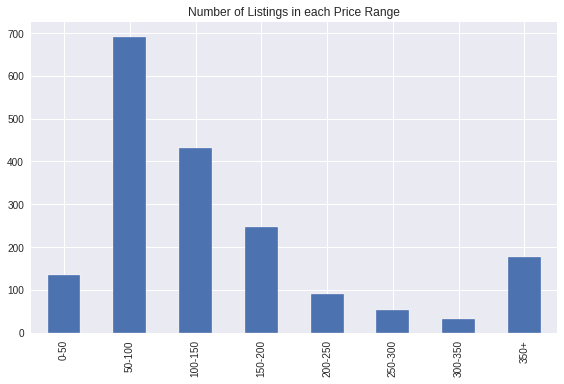

In [326]:
plt.style.use("seaborn")
price_range = pd.cut(data["price"], 
                     bins=[0, 50, 100, 150, 200, 250, 300, 350, data["price"].max()], 
                     labels=["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350+"])
data["price_range"] = price_range 
data["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range")
plt.show()

Most offers are in the range of 50-100CHF, many offers above 350CHF confirm the thesis of a significant number of outliers

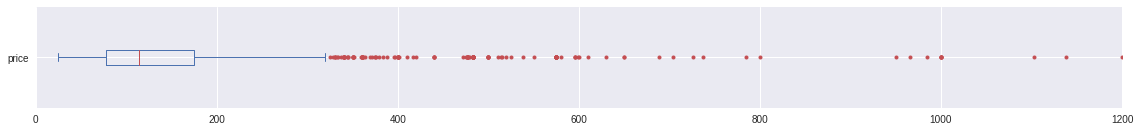

In [327]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data['price'].plot(kind='box', xlim=(0, 1200), vert=False, flierprops=red_square, figsize=(16,2));
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


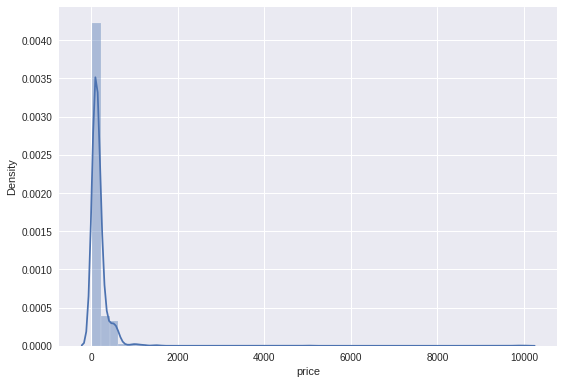

In [328]:
sns.distplot(data['price'])

Two above charts confirm presence of outliers, we have to delete them. 
Let's drop values above 600CHF and = 0.

In [329]:
# Getting rid of outliers
data.drop(data[ (data.price > 600) | (data.price == 0) ].index, axis=0, inplace=True)

In [330]:
data.describe()["price"]

count    1829.000000
mean      151.178786
std       121.985203
min        25.000000
25%        76.000000
50%       110.000000
75%       170.000000
max       600.000000
Name: price, dtype: float64

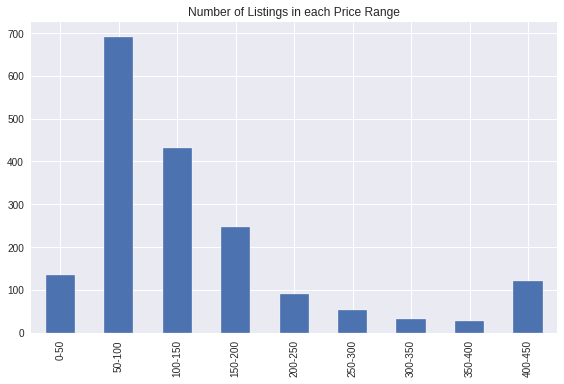

In [331]:
plt.style.use("seaborn")
price_range = pd.cut(data["price"], 
                     bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, data["price"].max()], 
                     labels=["0-50", "50-100", "100-150", "150-200", "200-250", "250-300", "300-350", "350-400","400-450"])
data["price_range"] = price_range 
data["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range")
plt.show()

In [332]:
#skewness and kurtosis
print("Skewness: %f" % data['price'].skew()) #the mass of the distribution is concentrated on the left
print("Kurtosis: %f" % data['price'].kurt()) #hihs kurtosis indicates that probability of outliers is high

from scipy import stats
p_value = stats.shapiro(data["price"])[1]
if p_value <= 0.05:
    print("values are not normally distributed")
else:
    print("values are normally distributed")

Skewness: 2.097947
Kurtosis: 4.064077
values are not normally distributed


Thanks to removal of outliers it looks much better

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


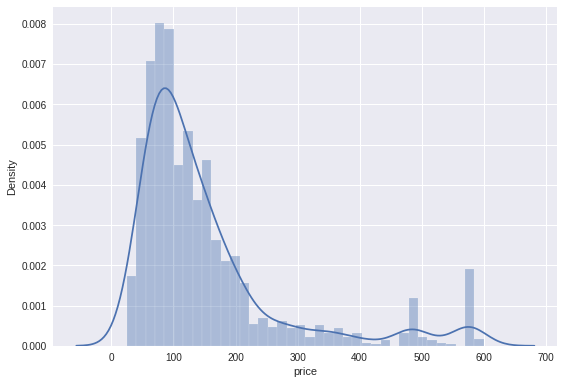

In [333]:
sns.distplot(data['price'])

The distribution of data looks much better. After removing offers priced higher than 600CHF we still see quite a few outliers but we will not remove them so as not to lose too much data.

# Reviews

Let's deal with review columns

In [334]:
review_col = data.filter(like='review_scores').columns
data[review_col].head()


,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.78,4.87,4.80,4.84,4.93,4.71,4.61
1,4.52,4.67,4.70,4.64,4.77,4.60,4.47
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.89,4.89,4.89,4.89,4.89,5.00,4.89
4,4.74,4.67,4.74,4.85,4.70,4.70,4.59


We can see NaN values

In [335]:
data[review_col].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1461.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,4.705051,4.769062,4.740103,4.844690,4.820262,4.794538,4.626993
std,0.561484,0.442936,0.384681,0.368072,0.404025,0.313125,0.450134
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.640000,4.730000,4.650000,4.830000,4.800000,4.710000,4.500000
50%,4.850000,4.900000,4.850000,4.960000,4.960000,4.890000,4.710000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.910000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [336]:
review_col2 =['review_scores_rating',	'review_scores_accuracy',	'review_scores_cleanliness',
              'review_scores_checkin',	'review_scores_communication',	'review_scores_location',
              'review_scores_value']

Let's plot all of the above just to get an idea of how the data is distributed

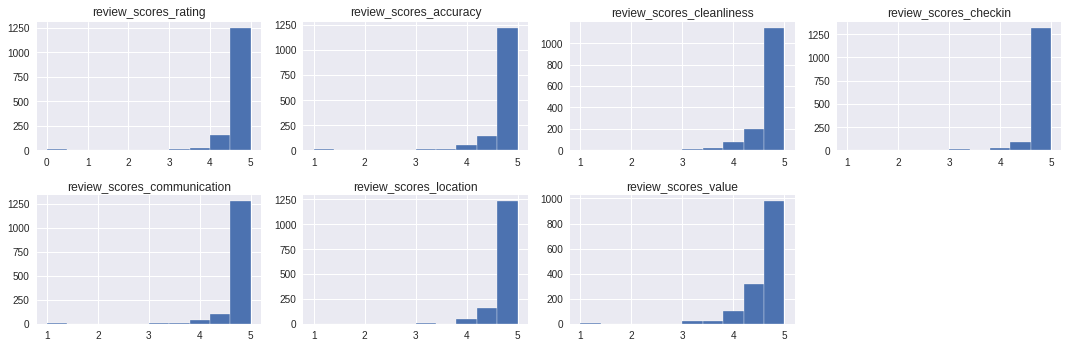

In [337]:
plt.figure(figsize=(15, 5))
n=1
for col in review_col:
  
  plt.subplot(2,4,n)
  n=n+1
  plt.hist(data[col])
  plt.title(col)
  
  
plt.show()

As we can see above, all the review scores are distributed similar

Let's see whether this variables are correlated with each other

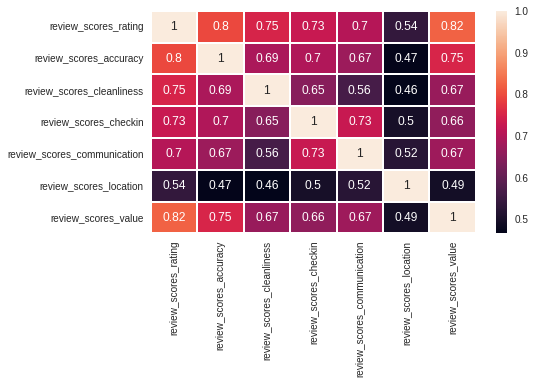

In [338]:
f, ax = plt.subplots()
sns.heatmap(data[review_col].corr( method='pearson', min_periods=1),annot=True,linewidths=1)
plt.show()

The above columns are generally highly correlated with each other (maybe except 'review_location_scores')

In [339]:
for col in review_col:
    print(("The pearson correlation coefficient between " + col + " and price is {0[0]: .4f} with a p-value of {0[1]: .4f}.").format(stats.pearsonr(data[-data[col].isna()][col],data[-data[col].isna()]["price"])))

The pearson correlation coefficient between review_scores_rating and price is  0.0211 with a p-value of  0.4201.
The pearson correlation coefficient between review_scores_accuracy and price is  0.0025 with a p-value of  0.9233.
The pearson correlation coefficient between review_scores_cleanliness and price is  0.0709 with a p-value of  0.0069.
The pearson correlation coefficient between review_scores_checkin and price is  0.0232 with a p-value of  0.3783.
The pearson correlation coefficient between review_scores_communication and price is  0.0083 with a p-value of  0.7529.
The pearson correlation coefficient between review_scores_location and price is -0.0089 with a p-value of  0.7337.
The pearson correlation coefficient between review_scores_value and price is -0.0764 with a p-value of  0.0036.


As we can see, there is no high correlation between reviews and price, but let's keep it for now. It may be usefull

Filling missing review scores with mean value (I assume that it is more reasonable to assign an average value than 0 ) 


In [340]:
data = data.fillna(value={'review_scores_rating': data['review_scores_rating'].mean(), 
            'review_scores_accuracy': data['review_scores_accuracy'].mean(),
            'review_scores_location': data['review_scores_location'].mean(),
            'review_scores_checkin': data['review_scores_checkin'].mean(),
            'review_scores_checkin': data['review_scores_checkin'].mean(),
            'review_scores_value': data['review_scores_value'].mean(),
            'review_scores_cleanliness': data['review_scores_cleanliness'].mean(),
            'review_scores_communication': data['review_scores_communication'].mean()})

In [341]:
data[review_col].head() # checking if that works

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.780000,4.870000,4.800000,4.84000,4.930000,4.710000,4.610000
1,4.520000,4.670000,4.700000,4.64000,4.770000,4.600000,4.470000
2,4.705051,4.769062,4.740103,4.84469,4.820262,4.794538,4.626993
3,4.890000,4.890000,4.890000,4.89000,4.890000,5.000000,4.890000
4,4.740000,4.670000,4.740000,4.85000,4.700000,4.700000,4.590000


In [342]:
listings_na = data.isna().sum()
listings_na[listings_na.values > 0].sort_values(ascending=False)

reviews_per_month       368
host_response_time      362
host_response_rate      362
bedrooms                253
host_acceptance_rate    229
dtype: int64

Let's see reviews_per_month 

In [343]:
data["reviews_per_month"].describe()

count    1461.000000
mean        0.984387
std         1.381477
min         0.010000
25%         0.170000
50%         0.440000
75%         1.150000
max        11.970000
Name: reviews_per_month, dtype: float64

In [344]:
#data['reviews_per_month'] = data['reviews_per_month'].fillna(value=0) #fillin NaN with 0s
#data["reviews_per_month"].describe()

In [345]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].median()) #fillin NaN with median
data["reviews_per_month"].describe()

count    1829.000000
mean        0.874855
std         1.253768
min         0.010000
25%         0.220000
50%         0.440000
75%         0.930000
max        11.970000
Name: reviews_per_month, dtype: float64

After thorough code review, I assume it's better to fill NaN with median than with 0s. A lot of offers has been online since 2010, so it's hard to believe thah the've got 0 reviews - it must be some data malfuncion

```
```



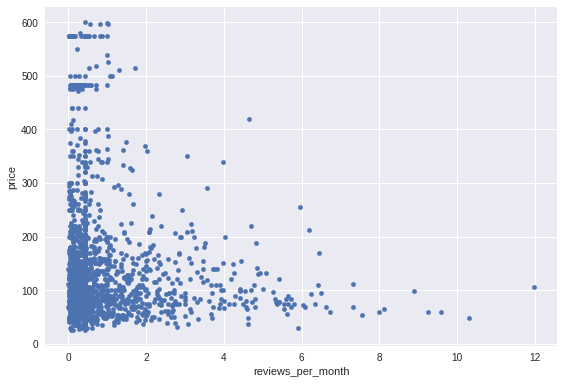

In [346]:
#scatter plot reviews_per_month/price
var = 'reviews_per_month'
reviews_per_month = pd.concat([data['price'], data[var]], axis=1)
reviews_per_month.plot.scatter(x=var, y='price');

In [347]:
print("The correlation between price and reviews_per_month is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(data['reviews_per_month'], data['price'])))


The correlation between price and reviews_per_month is -0.1419 with a p-value of  0.0000.


The pearson correlation coefficient between reviews_per_month and price is  -0.14.

Low negative correlation, less reviews means higer price. If we have few variables we could use it 

Let's take a closer look to number_of_reviews

In [348]:
data['number_of_reviews'].describe()

count    1829.000000
mean       27.552214
std        60.348071
min         0.000000
25%         1.000000
50%         6.000000
75%        25.000000
max       834.000000
Name: number_of_reviews, dtype: float64

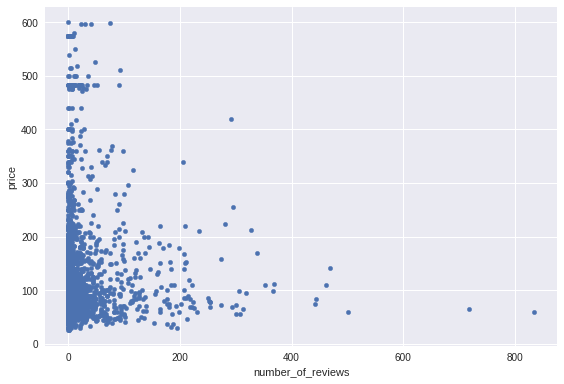

In [349]:
#scatter plot number of reviews/price
var = 'number_of_reviews'
number_of_reviews = pd.concat([data['price'], data[var]], axis=1)
number_of_reviews.plot.scatter(x=var, y='price');

In [350]:
print("The correlation between price and number_of_reviews is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(data['number_of_reviews'], data['price'])))


The correlation between price and number_of_reviews is -0.1017 with a p-value of  0.0000.


Similar to 'reviews_per_month', we won't use this in our model

# Host info

In [351]:
data.filter(like='host').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1829 entries, 0 to 1915
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   host_since              1829 non-null   object
 1   host_response_time      1467 non-null   object
 2   host_response_rate      1467 non-null   object
 3   host_acceptance_rate    1600 non-null   object
 4   host_is_superhost       1829 non-null   object
 5   host_verifications      1829 non-null   object
 6   host_has_profile_pic    1829 non-null   object
 7   host_identity_verified  1829 non-null   object
dtypes: object(8)
memory usage: 128.6+ KB


Let's take a closer look at the host boolen data 

In [352]:
host1 = ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic']

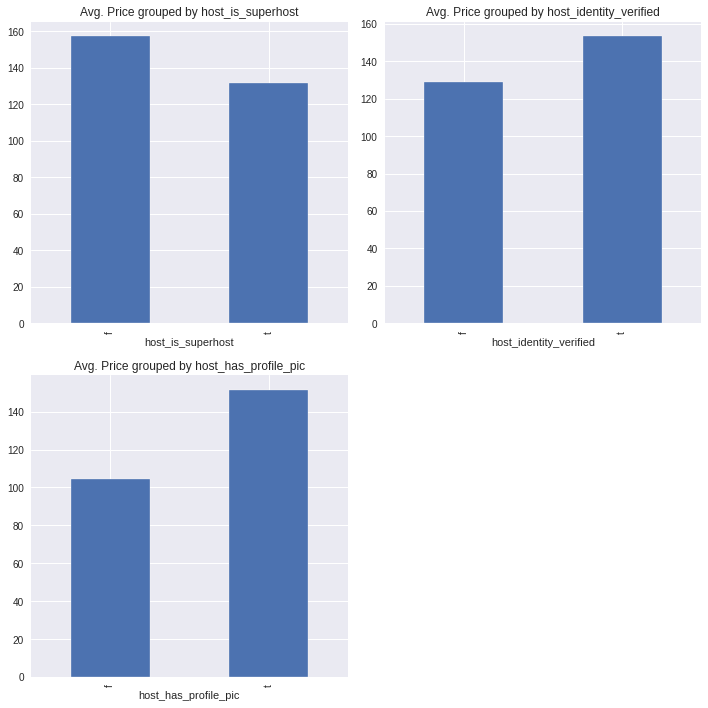

In [353]:
i = 1
for col in host1:
  plt.subplot(2,2,i)
  avg_price_host = data.groupby(col).mean()["price"]
  avg_price_host.plot(kind="bar", figsize=(10, 10))
  plt.title("Avg. Price grouped by "+col)
  i=i+1

plt.show()

It seems that there is no correlation with price, but we can't be sure. Interestingly the average price with superhost status is lower than without it

In [354]:
#convert string true and false to numeric
def object2bool(x):
    if x=="t" or x=="T":
        return 1.0
    elif x=="f" or x=="F":
        return 0.0
    else:
        return None

boolean_features = ["host_is_superhost","host_has_profile_pic",
                    "host_identity_verified"]

for i in boolean_features:
    data[i] = data[i].map(object2bool)

data[boolean_features].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified
0,0.0,1.0,1.0
1,1.0,1.0,1.0
2,0.0,1.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,1.0


In [355]:
host1.append('price')

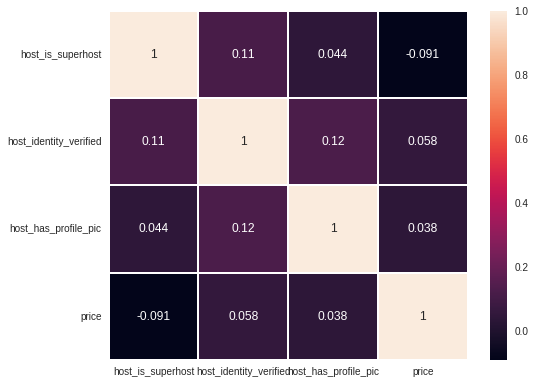

In [356]:
f, ax = plt.subplots()
sns.heatmap(data[host1].corr( method='pearson', min_periods=1),annot=True,linewidths=1)
plt.show()

There is no high correlaion between price and above columns. 

Let's investigate response and acceptance rate

In [357]:
print(data['host_response_rate'].describe()) #misinterpretations of the type of variables, due to the % sign

count     1467
unique      37
top       100%
freq       987
Name: host_response_rate, dtype: object


In [358]:
data["host_response_rate"] = [str(x).replace('%',' ') for x in data["host_response_rate"]] # Remove % sign
data["host_response_rate"] = data["host_response_rate"].astype("float") # Cast the column into type float
data["host_response_rate"] = data["host_response_rate"] / 100
#data['host_response_rate'] = data['host_response_rate'].fillna(value=0) #fillin NaN in 'host_response_rate' with 0s
data.describe()["host_response_rate"]

count    1467.000000
mean        0.917239
std         0.219538
min         0.000000
25%         0.980000
50%         1.000000
75%         1.000000
max         1.000000
Name: host_response_rate, dtype: float64

In [359]:
print(data['host_acceptance_rate'].describe()) #misinterpretations of the type of variables, due to the % sign

count     1600
unique      80
top       100%
freq       520
Name: host_acceptance_rate, dtype: object


In [360]:
data["host_acceptance_rate"] = [str(x).replace('%',' ') for x in data["host_acceptance_rate"]] # Remove % sign
data["host_acceptance_rate"] = data["host_acceptance_rate"].astype("float") # Cast the column into type float
data["host_acceptance_rate"] = data["host_acceptance_rate"] / 100
data.describe()["host_acceptance_rate"]

count    1600.000000
mean        0.794212
std         0.291961
min         0.000000
25%         0.670000
50%         0.960000
75%         1.000000
max         1.000000
Name: host_acceptance_rate, dtype: float64

In [361]:
host2 = ['price','host_acceptance_rate', 'host_response_rate']

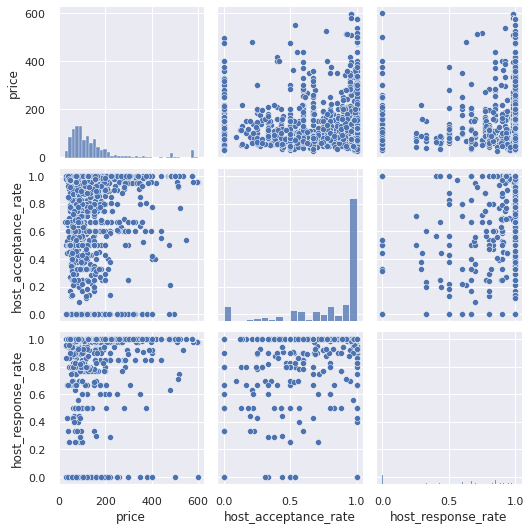

In [362]:
sns.set()
sns.pairplot(data[host2])


This plots don't tell us much. Let's see correlation in numbers

In [363]:
host2.remove('price')

In [364]:
for col in host2:
    print(("The pearson correlation coefficient between " + col + " and price is {0[0]: .3f} with a p-value of {0[1]: .3f}.").format(stats.pearsonr(data[-data[col].isna()][col],data[-data[col].isna()]["price"])))

The pearson correlation coefficient between host_acceptance_rate and price is  0.133 with a p-value of  0.000.
The pearson correlation coefficient between host_response_rate and price is  0.047 with a p-value of  0.075.


There is a small corelation between price and host_acceptance_rate. If we have few variables we could use it 

# Room type

In [365]:
data.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_locatio

Property type column

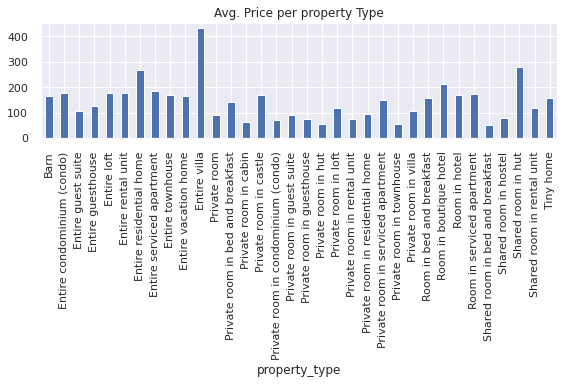

In [366]:
prop_type_avg_price = data.groupby(['property_type'])['price'].mean()
prop_type_avg_price.plot(kind="bar")
plt.title("Avg. Price per property Type")
plt.show()

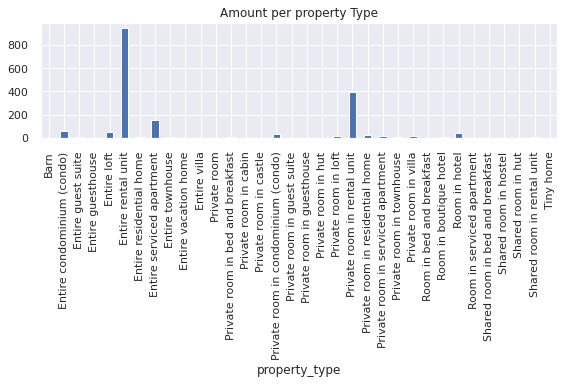

In [367]:
prop_type_grp = data.groupby(['property_type'])['price'].count()
prop_type_grp.plot(kind="bar")
plt.title("Amount per property Type")
plt.show()

Most of the offers falls into categories: Entire rental unit or Private room in rental unit

Room type

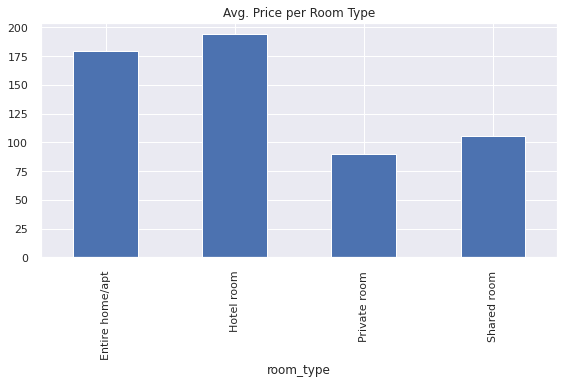

In [368]:
room_type_avg_price = data.groupby(['room_type'])['price'].mean()
room_type_avg_price.plot(kind="bar")
plt.title("Avg. Price per Room Type")
plt.show()

In [369]:
print(data.groupby(['room_type'])['price'].count())


room_type
Entire home/apt    1234
Hotel room            8
Private room        573
Shared room          14
Name: price, dtype: int64


Columns "property type" and "room type" are similar. Let's use "room type" as it's easier to convert into boolean

Creating column with info whether someone has rented the whole flat or just a room/shared room


In [370]:
data["is_entire_apt"] = np.where(data["room_type"]== "Entire home/apt", 1, 0)

In [371]:
print("The correlation between price and is_entire_apt is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(data['is_entire_apt'], data['price'])))

The correlation between price and is_entire_apt is  0.3385 with a p-value of  0.0000.


As we can see variable 'is_entire_apt' has moderate degree of corelation with price. We could use it in our model

# Beds, bedrooms, bathrooms and accommodates

In [372]:
total = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data["Total"]>0])

                      Total   Percent
host_response_rate      362  0.197922
host_response_time      362  0.197922
bedrooms                253  0.138327
host_acceptance_rate    229  0.125205


In [373]:
data['accommodates'].unique()

array([ 4,  3,  2,  1, 10,  6,  7,  5,  8, 16, 12,  9])

In [374]:
accommodates_beds = ['bathrooms', 'bedrooms', 'beds', 'accommodates']

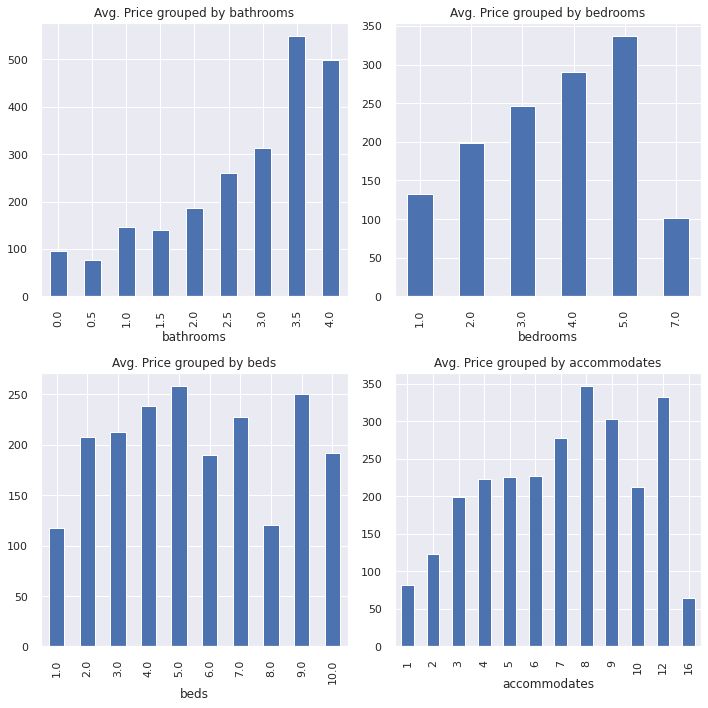

In [375]:
i = 1
for col in accommodates_beds:
  plt.subplot(2,2,i)
  avg_price_host = data.groupby(col).mean()["price"]
  avg_price_host.plot(kind="bar", figsize=(10, 10))
  plt.title("Avg. Price grouped by "+col)
  i=i+1

plt.show()

As we can see above there might be correlation between price and this variables

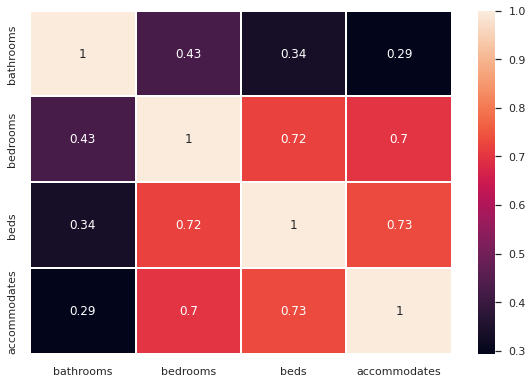

In [376]:
f, ax = plt.subplots()
sns.heatmap(data[accommodates_beds].corr( method='pearson', min_periods=1),annot=True,linewidths=1)
plt.show()

In [377]:
for col in accommodates_beds:
    print(("The pearson correlation coefficient between " + col + " and price is {0[0]: .4f} with a p-value of {0[1]: .4f}.").format(stats.pearsonr(data[-data[col].isna()][col],data[-data[col].isna()]["price"])))

The pearson correlation coefficient between bathrooms and price is  0.1545 with a p-value of  0.0000.
The pearson correlation coefficient between bedrooms and price is  0.2890 with a p-value of  0.0000.
The pearson correlation coefficient between beds and price is  0.2901 with a p-value of  0.0000.
The pearson correlation coefficient between accommodates and price is  0.4079 with a p-value of  0.0000.


Finally we found a variables with strong correlation with price. Unfortunatelly 'accommodates', 'beds' and 'bedrooms' are highly correlated with each other. Because we have a lot of NaN in 'bedrooms' we won't use it

# Neighbourhood and location

In [378]:
data.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_locatio

In [379]:
data['neighbourhood_cleansed'].unique()

array(['Sihlfeld', 'Alt-Wiedikon', 'Enge', 'Witikon', 'Höngg',
       'Wollishofen', 'Escher Wyss', 'Gewerbeschule', 'Rathaus',
       'Hochschulen', 'Altstetten', 'Oerlikon', 'Wipkingen', 'Hard',
       'Langstrasse', 'Friesenberg', 'Seebach', 'Schwamendingen-Mitte',
       'Mühlebach', 'Hirslanden', 'Unterstrass', 'Hirzenbach', 'Weinegg',
       'Oberstrass', 'Hottingen', 'Lindenhof', 'Fluntern', 'Albisrieden',
       'Werd', 'Seefeld', 'Affoltern', 'City', 'Saatlen', 'Leimbach'],
      dtype=object)

In [380]:
data['neighbourhood_group_cleansed'].unique()

array(['Kreis 3', 'Kreis 2', 'Kreis 7', 'Kreis 10', 'Kreis 5', 'Kreis 1',
       'Kreis 9', 'Kreis 11', 'Kreis 4', 'Kreis 12', 'Kreis 8', 'Kreis 6'],
      dtype=object)

Kreis in german means district, It's easier to operate on grouped data. This districts have clearly defined borders.

In [381]:
district = data.groupby('neighbourhood_group_cleansed')\
            .agg({'neighbourhood_group_cleansed':'size', 'price':'mean'})\
            .rename(columns={'neighbourhood_group_cleansed':'count','price':'mean_price'}) \
            .sort_values(by='mean_price', ascending=False)\
            .reset_index()


district


,neighbourhood_group_cleansed,count,mean_price
0,Kreis 9,173,227.716763
1,Kreis 1,144,195.000000
2,Kreis 5,87,171.448276
3,Kreis 8,153,167.888889
4,Kreis 4,252,144.777778
5,Kreis 11,214,142.953271
6,Kreis 2,142,134.133803
7,Kreis 6,126,133.357143
8,Kreis 7,170,131.464706
9,Kreis 3,221,123.597285


That is interesting, because district 9 is not considered expensive.

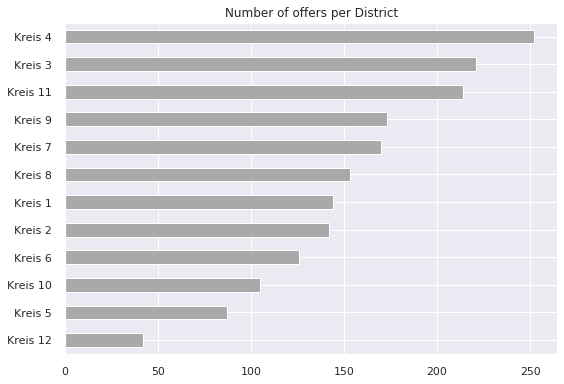

In [382]:
data['neighbourhood_group_cleansed'].value_counts().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Number of offers per District');


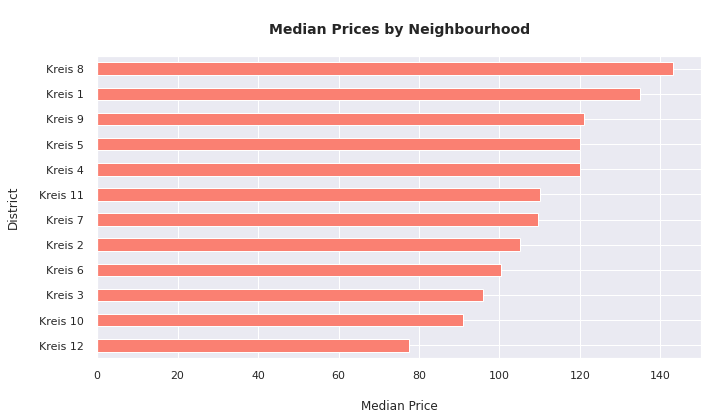

In [383]:
# group_by neighbourhood groups, take the median price and store new values in sub_df 
df_grouped = pd.DataFrame(data.groupby(['neighbourhood_group_cleansed'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='neighbourhood_group_cleansed', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

As we can see district has influence on rental price

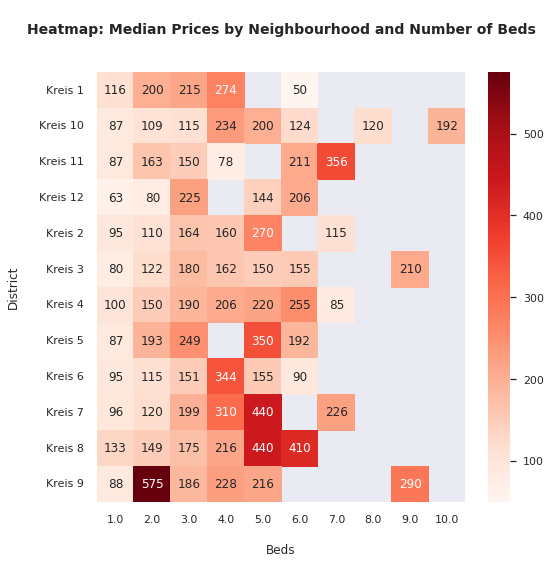

In [384]:
plt.figure(figsize=(8,8))
sns.heatmap(data.groupby(['neighbourhood_group_cleansed', 'beds']).price.median().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")

plt.xlabel('\nBeds', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nHeatmap: Median Prices by Neighbourhood and Number of Beds\n\n', fontsize=14, fontweight='bold');

It seems that for the host the best option is to rent apartment with 2 beds in district 9. It is also good to have apartment with 5 beds in districts 7 and 8


Lets look at the distance to centroid of Zurich

In [385]:
from geopy.distance import great_circle


In [386]:
def distance_to_mid(lat, lon):
    zurich_centre = (47.373950, 8.536647)
    accommodation = (lat, lon)
    return great_circle(zurich_centre, accommodation).km

In [387]:
data['distance'] = data.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

In [388]:
data['distance'].head(5)

0    1.286155
1    2.516045
2    2.121944
3    1.150296
4    5.199877
Name: distance, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


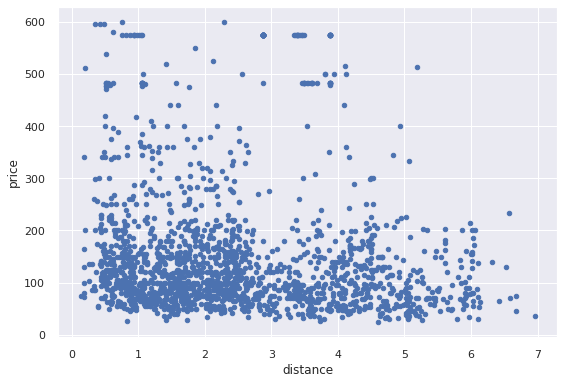

In [389]:
#let's look at the plot
loc = pd.concat([data['price'], data['distance']], axis=1)
loc.plot.scatter(x='distance', y='price');

The plot doesn't tell us much

In [390]:
  print("The correlation between price and distance is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(data['distance'], data['price'])))


The correlation between price and distance is -0.1053 with a p-value of  0.0000.


There is low negative correlation between distance to centre and rental price. Prices tend to be a little lower when closer to centre

# Amenities

In [391]:
data['amenities'].head(3)

0    ["Kitchen", "TV with standard cable", "Hot tub...
1    ["Kitchen", "Smoke alarm", "TV with standard c...
2    ["Baking sheet", "Hangers", "Elevator", "Dedic...
Name: amenities, dtype: object

In [392]:
from collections import Counter


In [393]:
results = Counter()
data['amenities'].str.strip('{}')\
               .str.replace(']', '')\
               .str.replace('[', '')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


[(' Wifi', 1698),
 (' Essentials', 1661),
 (' Long term stays allowed', 1602),
 (' Heating', 1476),
 (' Hair dryer', 1454),
 (' Dedicated workspace', 1351),
 (' Hot water', 1350),
 (' Iron', 1345),
 (' Kitchen', 1328),
 (' Washer', 1222),
 (' Cooking basics', 1195),
 (' Dishes and silverware', 1192),
 (' Refrigerator', 1102),
 (' Shampoo', 1056),
 (' Dryer', 998),
 (' Bed linens', 996),
 (' Coffee maker', 966),
 (' Stove', 788),
 (' Oven', 748),
 (' Elevator', 746)]

In [394]:
# create a new dataframe
sub_df = pd.DataFrame(results.most_common(20), columns=['amenity', 'count'])

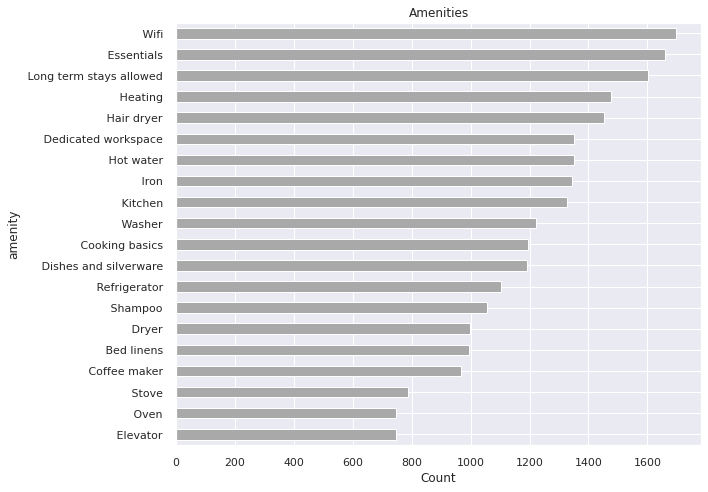

In [395]:
# plot the Top 20
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

Almost all apartments have Wifi, Essentials and allow long term stays. 

# Minimum/Maximum nights

In [396]:
data.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_locatio

It's better to use 'minimum_minimum_nights' than 'minimum_nights'. 
The chosen value is the smallest minimum_night value from the calender (looking 365 nights in the future)

In [397]:
data['minimum_minimum_nights'].describe()

count    1829.000000
mean        7.857299
std        34.956739
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      1125.000000
Name: minimum_minimum_nights, dtype: float64

In [398]:
#skewness and kurtosis
print("Skewness: %f" % data['minimum_minimum_nights'].skew())
print("Kurtosis: %f" % data['minimum_minimum_nights'].kurt())

Skewness: 21.000085
Kurtosis: 597.559284


High Kurtosis suggests that we have to ged rid of outliers

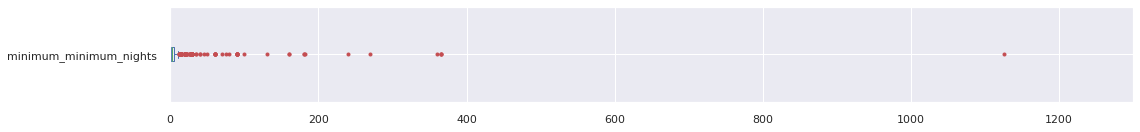

In [399]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data['minimum_minimum_nights'].plot(kind='box', xlim=(0, 1300), vert=False, flierprops=red_square, figsize=(16,2));
plt.show()

In [400]:
data.drop(data[ (data.minimum_minimum_nights > 100) | (data.price == 0) ].index, axis=0, inplace=True)
data['minimum_minimum_nights'].describe()

count    1816.000000
mean        5.665749
std        10.417354
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       100.000000
Name: minimum_minimum_nights, dtype: float64

In [401]:
#skewness and kurtosis
print("Skewness: %f" % data['minimum_minimum_nights'].skew())
print("Kurtosis: %f" % data['minimum_minimum_nights'].kurt())

Skewness: 4.836356
Kurtosis: 30.216368


Now it looks a little better

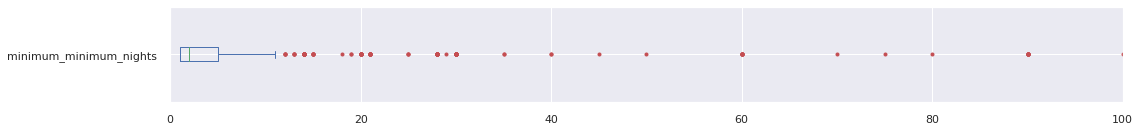

In [402]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data['minimum_minimum_nights'].plot(kind='box', xlim=(0, 100), vert=False, flierprops=red_square, figsize=(16,2));
plt.show()

'maximum_maximum_nights' is better than maximum nights like in the case of minimum_nights above

In [403]:
data['maximum_maximum_nights'].describe()

count    1.816000e+03
mean     4.730929e+06
std      1.007030e+08
min      1.000000e+00
25%      3.650000e+02
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_maximum_nights, dtype: float64

In [404]:
#skewness and kurtosis
print("Skewness: %f" % data['maximum_maximum_nights'].skew())
print("Kurtosis: %f" % data['maximum_maximum_nights'].kurt())

Skewness: 21.254373
Kurtosis: 450.244213


High Kurtosis suggests that we have to ged rid of outliers

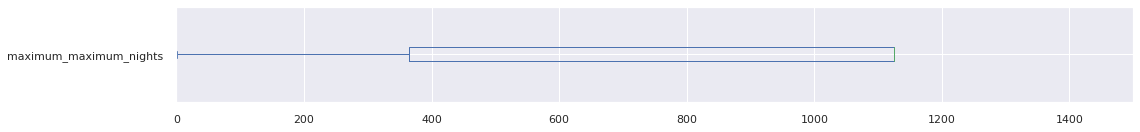

In [405]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data['maximum_maximum_nights'].plot(kind='box', xlim=(0, 1500), vert=False, flierprops=red_square, figsize=(16,2));
plt.show()

In [406]:
data.drop(data[ (data.maximum_maximum_nights > 1300) | (data.price == 0) ].index, axis=0, inplace=True)
data['maximum_maximum_nights'].describe()

count    1811.000000
mean      785.039205
std       476.332492
min         1.000000
25%       364.500000
50%      1125.000000
75%      1125.000000
max      1125.000000
Name: maximum_maximum_nights, dtype: float64

In [407]:
#skewness and kurtosis
print("Skewness: %f" % data['maximum_maximum_nights'].skew())
print("Kurtosis: %f" % data['maximum_maximum_nights'].kurt())

Skewness: -0.754706
Kurtosis: -1.323306


Now it looks better

In [408]:
nights = ['price', 'maximum_maximum_nights', 'minimum_minimum_nights']

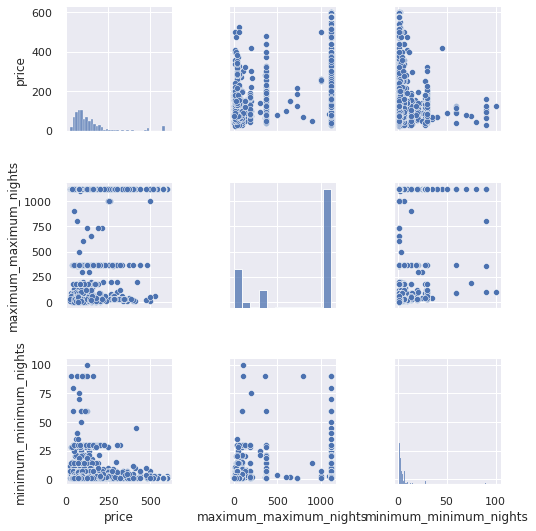

In [409]:
sns.set()
sns.pairplot(data[nights])

In [410]:
  print("The correlation between price and minimum_minimum_nights is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(data['minimum_minimum_nights'], data['price'])))
  print("The correlation between price and maximum_maximum_nights is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(data['maximum_maximum_nights'], data['price'])))


The correlation between price and minimum_minimum_nights is -0.1253 with a p-value of  0.0000.
The correlation between price and maximum_maximum_nights is  0.1442 with a p-value of  0.0000.


There is slight correlation between number of nights and price. The longer we can stay the price is a little higher, also the minimum nights we have to stay is lower the price is little higher

# Instant bookable/has availability

In [411]:
data['instant_bookable'].describe()

count     1811
unique       2
top          f
freq      1098
Name: instant_bookable, dtype: object

In [412]:
data['has_availability'].describe()

count     1811
unique       2
top          t
freq      1796
Name: has_availability, dtype: object

In [413]:
bookable = ['has_availability', 'instant_bookable' ]

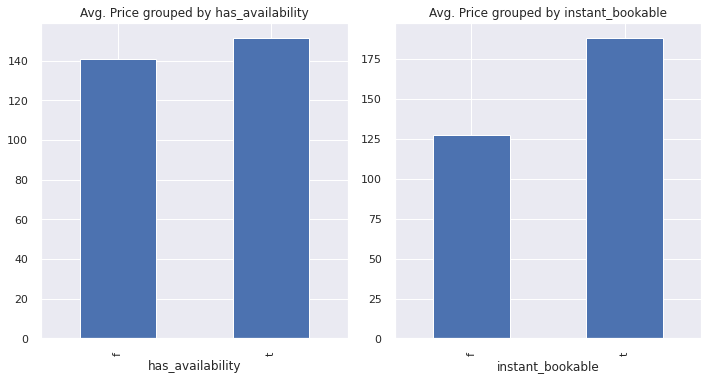

In [414]:
i = 1
for col in bookable:
  plt.subplot(2,2,i)
  avg_price_host = data.groupby(col).mean()["price"]
  avg_price_host.plot(kind="bar", figsize=(10, 10))
  plt.title("Avg. Price grouped by "+col)
  i=i+1

plt.show()

has availability doesn't seem to have correlation with price. Maybye instant bookable

In [415]:
#convert string true and false to numeric
def object2bool(x):
    if x=="t" or x=="T":
        return 1.0
    elif x=="f" or x=="F":
        return 0.0
    else:
        return None


for i in bookable:
    data[i] = data[i].map(object2bool)

data[bookable].head()

,has_availability,instant_bookable
2,1.0,0.0
3,1.0,0.0
4,1.0,1.0
5,1.0,0.0
6,1.0,0.0


In [416]:
bookable.append('price')

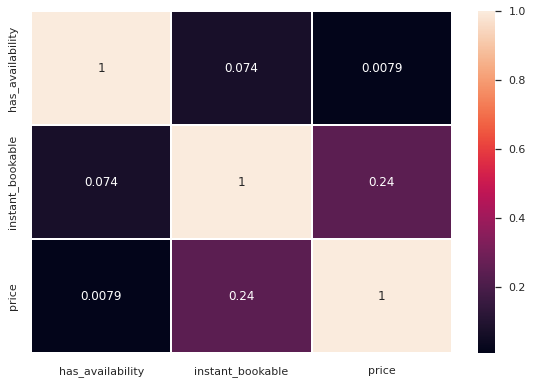

In [417]:
f, ax = plt.subplots()
sns.heatmap(data[bookable].corr( method='pearson', min_periods=1),annot=True,linewidths=1)
plt.show()

As we see above there is slight correlation between price and 'instant_bookable', we can use 'instant_bookable' in our model

# Model

Let's select variables that we are going to use build our model

In [418]:
chosen = ['instant_bookable', 'accommodates', 'beds', 
      'is_entire_apt', 'reviews_per_month', 'host_acceptance_rate', 
      'minimum_minimum_nights', 'maximum_maximum_nights' ]

In [419]:
#closer look
data[chosen].head()

,instant_bookable,accommodates,beds,is_entire_apt,reviews_per_month,host_acceptance_rate,minimum_minimum_nights,maximum_maximum_nights
2,0.0,2,2.0,1,0.44,0.0,3.0,365.0
3,0.0,1,1.0,0,0.07,0.0,5.0,31.0
4,1.0,2,1.0,0,0.38,1.0,2.0,1125.0
5,0.0,1,1.0,0,0.44,NaN,3.0,6.0
6,0.0,2,1.0,0,1.75,0.8,2.0,1125.0


In [420]:
total = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data["Total"]>0])

                      Total   Percent
host_response_rate      352  0.194368
host_response_time      352  0.194368
bedrooms                249  0.137493
host_acceptance_rate    220  0.121480


Looks like we've got some NaN values in one chosen variable

In [421]:
data['host_acceptance_rate'] = data['host_acceptance_rate'].fillna(data['host_acceptance_rate'].median()) #fillin NaN with median

In [422]:
#final look 
data[chosen].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811 entries, 2 to 1915
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant_bookable        1811 non-null   float64
 1   accommodates            1811 non-null   int64  
 2   beds                    1811 non-null   float64
 3   is_entire_apt           1811 non-null   int64  
 4   reviews_per_month       1811 non-null   float64
 5   host_acceptance_rate    1811 non-null   float64
 6   minimum_minimum_nights  1811 non-null   float64
 7   maximum_maximum_nights  1811 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 127.3 KB


Standarisation

In [423]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledFeatures = sc.fit_transform(data[chosen])
scaledFeatures

array([[-0.8058303 , -0.43060938,  0.43717556, ..., -2.92209459,
        -0.25691926, -0.8820629 ],
       [-0.8058303 , -1.09204585, -0.54878327, ..., -2.92209459,
        -0.06509045, -1.58344746],
       [ 1.24095606, -0.43060938, -0.54878327, ...,  0.66612978,
        -0.35283366,  0.71390195],
       ...,
       [ 1.24095606, -0.43060938,  0.43717556, ...,  0.66612978,
        -0.44874807, -0.8820629 ],
       [-0.8058303 , -0.43060938, -0.54878327, ...,  0.2714251 ,
         0.12673836, -0.8820629 ],
       [-0.8058303 , -0.43060938, -0.54878327, ...,  0.52260081,
        -0.44874807, -1.64224616]])

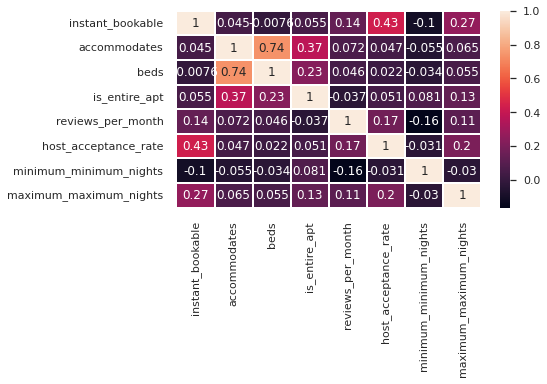

In [424]:
f, ax = plt.subplots()
sns.heatmap(data[chosen].corr( method='pearson', min_periods=1),annot=True,linewidths=1)
plt.show()

High correlation between beds and accommodation. Perhaps we should delete one of mentioned from our model

In [426]:
for col in chosen:
    print(("The pearson correlation coefficient between " + col + " and price is {0[0]: .3f} with a p-value of {0[1]: .3f}.").format(stats.pearsonr(data[-data[col].isna()][col],data[-data[col].isna()]["price"])))

The pearson correlation coefficient between instant_bookable and price is  0.243 with a p-value of  0.000.
The pearson correlation coefficient between accommodates and price is  0.409 with a p-value of  0.000.
The pearson correlation coefficient between beds and price is  0.288 with a p-value of  0.000.
The pearson correlation coefficient between is_entire_apt and price is  0.342 with a p-value of  0.000.
The pearson correlation coefficient between reviews_per_month and price is -0.144 with a p-value of  0.000.
The pearson correlation coefficient between host_acceptance_rate and price is  0.110 with a p-value of  0.000.
The pearson correlation coefficient between minimum_minimum_nights and price is -0.125 with a p-value of  0.000.
The pearson correlation coefficient between maximum_maximum_nights and price is  0.144 with a p-value of  0.000.


As we can see the highest correlation with price have accommodates and beds. Whether the whole appartment is rented also has a high correlation with the price. Important is also instant_bookable.

The next step would be to load the selected features into the selected model, however that was not the purpose of this exercise.